<a href="https://colab.research.google.com/github/gonulsinem/1_Python_ML/blob/main/2_MLR_CokluDogrusalRegresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


BTK Akademi- Python ile Makine Öğrenmesi Kursu calismalari ve kendi tuttuğum notlardan olusmaktadir.


1.   Kursta verilen odev_tenis.csv veri seti kullanildi




In [1]:
#kutuphaneler import edildi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# veriler okunup degiskene atandi
data = pd.read_csv('/content/odev_tenis.csv')
data

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [3]:
data.head()
#data'dan ornek bir kisim

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


In [73]:
data['play'].value_counts()

yes    9
no     5
Name: play, dtype: int64

In [74]:
data.describe()

,temperature,humidity
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


In [4]:
from sklearn.preprocessing import LabelEncoder


In [5]:
# tum verileri ayni anda label encoder yapmak icin:

data2 = data.apply(LabelEncoder().fit_transform)
data2

,outlook,temperature,humidity,windy,play
0,2,11,4,0,0
1,2,8,6,1,0
2,0,10,5,0,1
3,1,4,9,0,1
4,1,2,3,0,1
5,1,1,1,1,0
6,0,0,0,1,1
7,2,6,8,0,0
8,2,3,1,0,1
9,1,7,3,0,1


In [6]:
#ilk sutu icin OHE yapildi
x = data2.iloc[:,:1] #ilk sutun bir degiskene atandi
x

,outlook
0,2
1,2
2,0
3,1
4,1
5,1
6,0
7,2
8,2
9,1


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x),dtype=np.str)

# onehotencoder sınıfı için categorical_features parametresini kaldırdığından beri.
# Kategorik veri kümeleri icin ColumnTransformer sınıfının kullanılması tavsiye edilir.

In [8]:
x

array([['0.0', '0.0', '1.0'],
       ['0.0', '0.0', '1.0'],
       ['1.0', '0.0', '0.0'],
       ['0.0', '1.0', '0.0'],
       ['0.0', '1.0', '0.0'],
       ['0.0', '1.0', '0.0'],
       ['1.0', '0.0', '0.0'],
       ['0.0', '0.0', '1.0'],
       ['0.0', '0.0', '1.0'],
       ['0.0', '1.0', '0.0'],
       ['0.0', '0.0', '1.0'],
       ['1.0', '0.0', '0.0'],
       ['1.0', '0.0', '0.0'],
       ['0.0', '1.0', '0.0']], dtype='<U32')

In [9]:
#overcast -> 0 rainy->1 sunny->2
hava_durumu = pd.DataFrame(data=x, index = range(14), columns=['o','r','s'])
hava_durumu
#array DF'ye Donusturuldu

,o,r,s
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [10]:
data

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [11]:
sonDF = pd.concat([hava_durumu,data.iloc[:,1:3]], axis = 1)
sonDF
#sayisal olan veriler birlestirildi.

,o,r,s,temperature,humidity
0,0.0,0.0,1.0,85,85
1,0.0,0.0,1.0,80,90
2,1.0,0.0,0.0,83,86
3,0.0,1.0,0.0,70,96
4,0.0,1.0,0.0,68,80
5,0.0,1.0,0.0,65,70
6,1.0,0.0,0.0,64,65
7,0.0,0.0,1.0,72,95
8,0.0,0.0,1.0,69,70
9,0.0,1.0,0.0,75,80


In [12]:
data2

,outlook,temperature,humidity,windy,play
0,2,11,4,0,0
1,2,8,6,1,0
2,0,10,5,0,1
3,1,4,9,0,1
4,1,2,3,0,1
5,1,1,1,1,0
6,0,0,0,1,1
7,2,6,8,0,0
8,2,3,1,0,1
9,1,7,3,0,1


In [13]:
data2.iloc[:,-2:]

,windy,play
0,0,0
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,1,1
7,0,0
8,0,1
9,0,1


In [14]:
sonDF

,o,r,s,temperature,humidity
0,0.0,0.0,1.0,85,85
1,0.0,0.0,1.0,80,90
2,1.0,0.0,0.0,83,86
3,0.0,1.0,0.0,70,96
4,0.0,1.0,0.0,68,80
5,0.0,1.0,0.0,65,70
6,1.0,0.0,0.0,64,65
7,0.0,0.0,1.0,72,95
8,0.0,0.0,1.0,69,70
9,0.0,1.0,0.0,75,80


In [15]:
son_DF = pd.concat([data2.iloc[:,-2:], sonDF], axis = 1)
son_DF
# son2 kolonun LE yapilmis  hali alinarak veriler tamamlandi

,windy,play,o,r,s,temperature,humidity
0,0,0,0.0,0.0,1.0,85,85
1,1,0,0.0,0.0,1.0,80,90
2,0,1,1.0,0.0,0.0,83,86
3,0,1,0.0,1.0,0.0,70,96
4,0,1,0.0,1.0,0.0,68,80
5,1,0,0.0,1.0,0.0,65,70
6,1,1,1.0,0.0,0.0,64,65
7,0,0,0.0,0.0,1.0,72,95
8,0,1,0.0,0.0,1.0,69,70
9,0,1,0.0,1.0,0.0,75,80


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

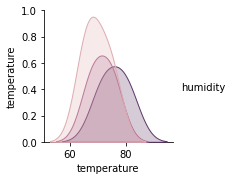

In [72]:
sns.pairplot(son_DF.iloc[:,:], hue="humidity")

In [16]:
# veriler train ve test icin bolundu
from sklearn.model_selection import train_test_split

In [17]:
ozellikler = sonDF.iloc[:,:-1]
ozellikler

,o,r,s,temperature
0,0.0,0.0,1.0,85
1,0.0,0.0,1.0,80
2,1.0,0.0,0.0,83
3,0.0,1.0,0.0,70
4,0.0,1.0,0.0,68
5,0.0,1.0,0.0,65
6,1.0,0.0,0.0,64
7,0.0,0.0,1.0,72
8,0.0,0.0,1.0,69
9,0.0,1.0,0.0,75


In [18]:
bagimli_degisken = son_DF.iloc[:,-1:]
bagimli_degisken
#humidity bagimli degisken

,humidity
0,85
1,90
2,86
3,96
4,80
5,70
6,65
7,95
8,70
9,80


In [49]:
x_train, x_test,y_train,y_test = train_test_split(son_DF.iloc[:,:-1],son_DF.iloc[:,-1:],test_size=0.33, random_state=0)

In [50]:
x_train

,play,o,r,s,temperature
13,0,0.0,1.0,0.0,71
9,1,0.0,1.0,0.0,75
1,0,0.0,0.0,1.0,80
7,0,0.0,0.0,1.0,72
10,1,0.0,0.0,1.0,75
3,1,0.0,1.0,0.0,70
0,0,0.0,0.0,1.0,85
5,0,0.0,1.0,0.0,65
12,1,1.0,0.0,0.0,81


In [51]:
x_test

,play,o,r,s,temperature
8,1,0.0,0.0,1.0,69
6,1,1.0,0.0,0.0,64
4,1,0.0,1.0,0.0,68
11,1,1.0,0.0,0.0,72
2,1,1.0,0.0,0.0,83


In [52]:
y_train

,humidity
13,91
9,80
1,90
7,95
10,70
3,96
0,85
5,70
12,75


In [53]:
y_test

,humidity
8,70
6,65
4,80
11,90
2,86


In [54]:
#MLP

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)


In [55]:
type(y_pred)

numpy.ndarray

In [56]:
print(y_pred)

[[77.98135142]
 [68.29304916]
 [81.05037539]
 [71.44926132]
 [75.78905304]]


In [58]:
df_y_pred = pd.DataFrame(y_pred, columns = ['humidity'])
df_y_pred

,humidity
0,77.981351
1,68.293049
2,81.050375
3,71.449261
4,75.789053


In [59]:
y_test
#y_test ve y_pred degerleri

,humidity
8,70
6,65
4,80
11,90
2,86


In [60]:
son_DF

,play,o,r,s,temperature,humidity
0,0,0.0,0.0,1.0,85,85
1,0,0.0,0.0,1.0,80,90
2,1,1.0,0.0,0.0,83,86
3,1,0.0,1.0,0.0,70,96
4,1,0.0,1.0,0.0,68,80
5,0,0.0,1.0,0.0,65,70
6,1,1.0,0.0,0.0,64,65
7,0,0.0,0.0,1.0,72,95
8,1,0.0,0.0,1.0,69,70
9,1,0.0,1.0,0.0,75,80


In [61]:
#backward elimination
#import statsmodels.formula.api as sm 
import statsmodels.api as sm
X = np.append(arr = np.ones((14,1)).astype(int), values=son_DF.iloc[:,:-1], axis=1 )
X_l = son_DF.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l,dtype=float)#bunu ekledim



In [62]:
r_ols = sm.OLS(endog = son_DF.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
print(r.summary())

son_DF = son_DF.iloc[:,1:]

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.350e+28
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          1.78e-111
Time:                        12:29:25   Log-Likelihood:                 398.14
No. Observations:                  14   AIC:                            -784.3
Df Residuals:                       8   BIC:                            -780.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.105e-15   9.73e-14      0.073      0.9

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [63]:
X = np.append(arr = np.ones((14,1)).astype(int), values=son_DF.iloc[:,:-1], axis=1 )
X_l = son_DF.iloc[:,[0,1,2,3,4]].values
X_l = np.array(X_l,dtype=float)#bunu ekledim


r_ols = sm.OLS(endog = son_DF.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.192e+29
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          3.60e-131
Time:                        12:29:29   Log-Likelihood:                 417.90
No. Observations:                  14   AIC:                            -825.8
Df Residuals:                       9   BIC:                            -822.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.137e-13    1.2e-13      0.946      0.3

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [64]:
x_train

,play,o,r,s,temperature
13,0,0.0,1.0,0.0,71
9,1,0.0,1.0,0.0,75
1,0,0.0,0.0,1.0,80
7,0,0.0,0.0,1.0,72
10,1,0.0,0.0,1.0,75
3,1,0.0,1.0,0.0,70
0,0,0.0,0.0,1.0,85
5,0,0.0,1.0,0.0,65
12,1,1.0,0.0,0.0,81


In [65]:
x_train = x_train.iloc[:,1:]
x_test = x_test.iloc[:,1:]
print(type(x_train))
print(type(x_test))
print(type(y_train))



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [67]:
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
regressor.fit(x_train,y_train)


y_pred = regressor.predict(x_test)

[[81.86890756]
 [69.08571429]
 [83.46722689]
 [71.86890756]
 [75.69579832]]


In [68]:
y_pred

array([[81.86890756],
       [69.08571429],
       [83.46722689],
       [71.86890756],
       [75.69579832]])

In [69]:
y_test

,humidity
8,70
6,65
4,80
11,90
2,86
